In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [149]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
breast_cancer=breast_cancer_wisconsin_original.data
breast_cancer['original'].head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [150]:
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

In [151]:
X.drop(columns=['Bare_nuclei'], inplace=True) # drop the id column

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [152]:
X.shape

(699, 8)

In [153]:
X.isna().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)
lr=LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\dai.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [155]:
print(lr.coef_)
lr.intercept_

[[ 0.55801491 -0.10195273  0.57416081  0.39114873  0.11886461  0.52782899
   0.14804273  0.85485359]]


array([-9.87087574])

In [156]:
y_pred=lr.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 4], dtype=int64)

0.9571428571428572

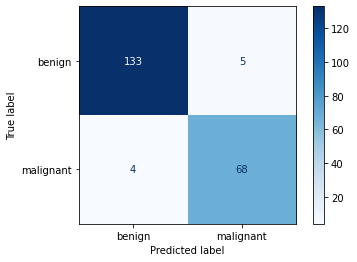

In [157]:
# lr.score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
disp.plot(cmap='Blues')
accuracy_score(y_test,y_pred)

#None =>  0.9523809523809523
# L1 - liblinear => 0.9666666666666667
# L2 - lbfgs => 0.9523809523809523
# elestic net - saga => 0.9571428571428572

In [158]:
from sklearn.metrics import precision_score, recall_score, f1_score

#Recall for 2 class
recall_2=recall_score(y_test, y_pred, pos_label=2)

#Recall for 4 class
recall_4=recall_score(y_test, y_pred, pos_label=4)

recall_2, recall_4

(0.9637681159420289, 0.9444444444444444)

In [159]:
#Precision score

precision = precision_score(y_test, y_pred, pos_label=2)
precision

0.9708029197080292

In [160]:
#F1 score
f1 = f1_score(y_test, y_pred, pos_label=2)
f1

0.9672727272727273

In [161]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['benign', 'malignant']))

              precision    recall  f1-score   support

      benign       0.97      0.96      0.97       138
   malignant       0.93      0.94      0.94        72

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210

